In [64]:
import VAE_code_function as vae
import CNN_code_function as cnn
import numpy as np

In [65]:
# Define the base directory where the dataset is located
base_dir = r'C:\Users\20213002\.vscode\Y3Q3 Project AI MIA'

# Define the model name
model_name = 'CVEA_Project_AI_version_4'

# Define the file path for saving the model architecture
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

# Batch size for training
batch_size = 64

# Image size
img_size = 96

# The number of epochs for training
nr_epochs = 1

# Portion of training data used for VAE [0.0,1)
split = 0.05

# latent dimensions for the VAE
latent_dim = 100

# Number of images displayed
n = 50

print('Model name is {}'.format(model_name))
print('Parameters-->\n Number of epochs: {}\n Batch size: {}\n Portion training data: {:.0%}\n Latend dim: {}'.format(nr_epochs, batch_size, split, latent_dim))

Model name is CVEA_Project_AI_version_4
Parameters-->
 Number of epochs: 1
 Batch size: 32
 Portion training data: 5%
 Latend dim: 100


Found 3600 images belonging to 1 classes.
Found 8000 images belonging to 1 classes.
112/112 [==============================] - ETA: 0s - loss: 1419850.7500 - kl_loss: 673.8488 - reconstruction_loss: 1419.1775
Epoch 1: val_loss improved from inf to 1156398.87500, saving model to CVEA_Project_AI_version_4_weights.hdf5
250/250 [==============================] - 200s 800ms/step


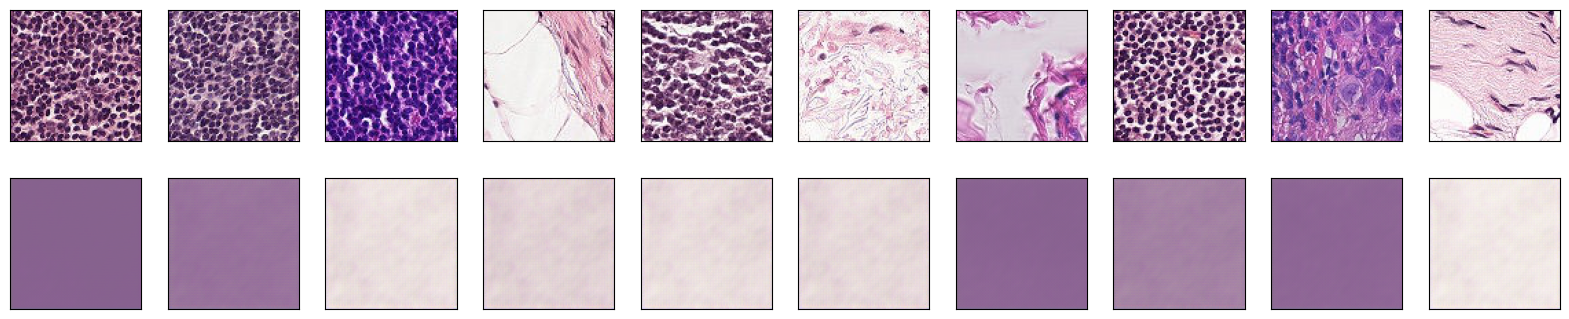

1/1 [==============================] - 0s 303ms/step


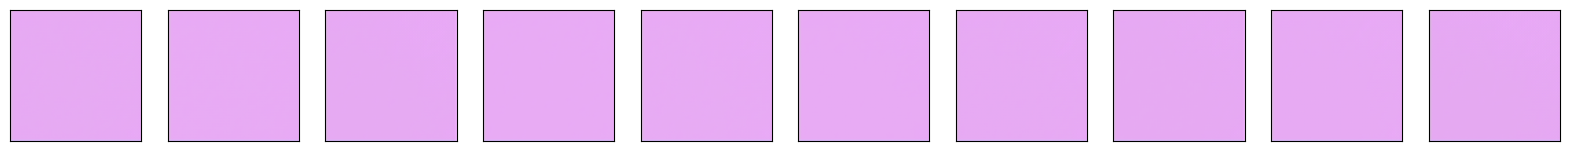

2/2 [==============================] - 0s 180ms/step
Images saved to: C:\Users\20213002\.vscode\Y3Q3 Project AI MIA/train_new_images_5/0/
Found 3600 images belonging to 1 classes.
Found 8000 images belonging to 1 classes.
112/112 [==============================] - ETA: 0s - loss: 1936616.8750 - kl_loss: 767976.2500 - reconstruction_loss: 1172.0680
Epoch 1: val_loss improved from inf to 958425.62500, saving model to CVEA_Project_AI_version_4_weights.hdf5
250/250 [==============================] - 288s 1s/step


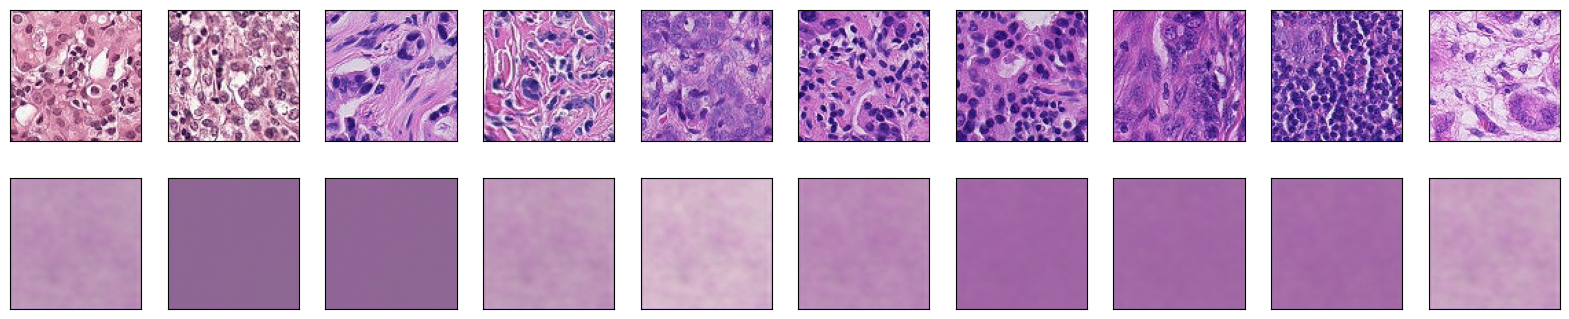

1/1 [==============================] - 0s 242ms/step


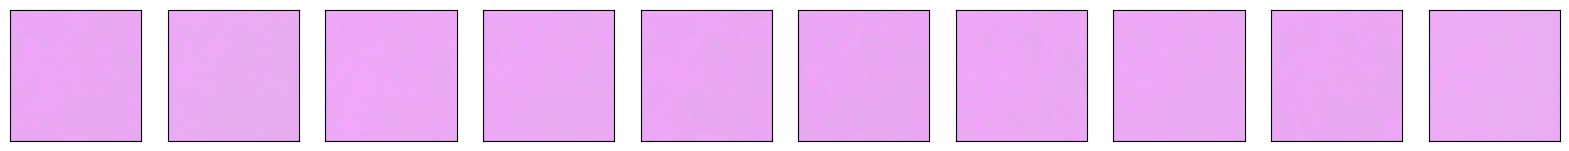

2/2 [==============================] - 1s 228ms/step
Images saved to: C:\Users\20213002\.vscode\Y3Q3 Project AI MIA/train_new_images_5/1/


In [66]:
# Perform autoencoder for specified classes (for both classes = [0,1])
classes = [0,1]
for i in classes:
    # Get data generators for the specified class
    train_gen, val_gen = vae.get_pcam_generators(base_dir, 
                                                 model_type='vae',
                                                 split=split, 
                                                 batch_size_gen=batch_size, 
                                                 class_type=i)
    
    # Construct VAE model and train it
    model_name = model_name+'_'+str(i)
    model, decoder = vae.construct_vae(train_gen, val_gen, weights_filepath, model_name, nr_epochs, latent_dim)
    
    # Reconstruct and display images
    vae.reconstruct_img(model, val_gen)

    # Generate new images, display and save them
    random_vector = np.random.random_sample(size=(10, latent_dim))
    vae.display_generated(decoder, random_vector)
    
    vae.generate_new_img(decoder, base_dir, latent_dim=latent_dim, split=split, class_type=i, num_samples=n)

In [67]:
def calculate_and_plot_ROC_AUC(base_dir, split, type='dense', model_name='my_model'):
    """
    Combine different functions to create and train the model, and to calculate and plot the ROC curve and AUC value.

    Args:
        base_dir (str): Path name with location of dataset.
        type (str): Type of model to use ('dense' or 'conv'). Default is 'dense'.
        model_name (str): Name of the model.

    """
    # Get the model
    if type == 'dense':
        model = cnn.get_model()
    elif type == 'conv':
        model = cnn.get_fcn_model()

    # Get the data generators
    train_gen, val_gen= vae.get_pcam_generators(base_dir, 
                                                model_type='cnn',
                                                split=split)
    
    model_filepath = model_name + '.json'
    weights_filepath = model_name + '_weights.hdf5'

    # Train the model
    cnn.train_model(model, train_gen, val_gen, weights_filepath, model_filepath, epochs=3)

    # Load the trained model weights
    model.load_weights(weights_filepath)

    # Evaluate the model
    score = model.evaluate(val_gen)
    print("Loss:", score[0])
    print("Accuracy:", score[1])
    
    # Calculate ROC and AUC
    fpr, tpr, roc_auc = cnn.calculate_roc_and_auc(model, val_gen)
    print("AUC:", roc_auc)
    
    # Plot ROC curve
    cnn.plot_roc_curve(fpr, tpr, roc_auc, type)

Found 100 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Epoch 1/3
2/3 [===================>..........] - ETA: 0s - loss: 0.6898 - auc_32: 0.6032 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69431, saving model to CVEA_Project_AI_version_4_dense_weights.hdf5
3/3 [==============================] - 26s 13s/step - loss: 0.6920 - auc_32: 0.5571 - accuracy: 0.5441 - val_loss: 0.6943 - val_auc_32: 0.4528 - val_accuracy: 0.4783
Epoch 2/3
1/3 [=========>....................] - ETA: 0s - loss: 0.6915 - auc_32: 0.5000 - accuracy: 0.5312

c:\Users\20213002\.conda\envs\8p361\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - ETA: 0s - loss: 0.7002 - auc_32: 0.5275 - accuracy: 0.4559
Epoch 2: val_loss improved from 0.69431 to 0.69378, saving model to CVEA_Project_AI_version_4_dense_weights.hdf5
3/3 [==============================] - 29s 14s/step - loss: 0.7002 - auc_32: 0.5275 - accuracy: 0.4559 - val_loss: 0.6938 - val_auc_32: 0.4924 - val_accuracy: 0.4971
Epoch 3/3
3/3 [==============================] - ETA: 0s - loss: 0.7057 - auc_32: 0.4646 - accuracy: 0.5000
Epoch 3: val_loss did not improve from 0.69378
500/500 [==============================] - 32s 64ms/step - loss: 0.6938 - auc_32: 0.4924 - accuracy: 0.4971
Loss: 0.6937793493270874
Accuracy: 0.4923923909664154
500/500 [==============================] - 29s 58ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.98      0.66      8000
           1       0.41      0.01      0.02      8000

    accuracy                           0.50     16000
   macr

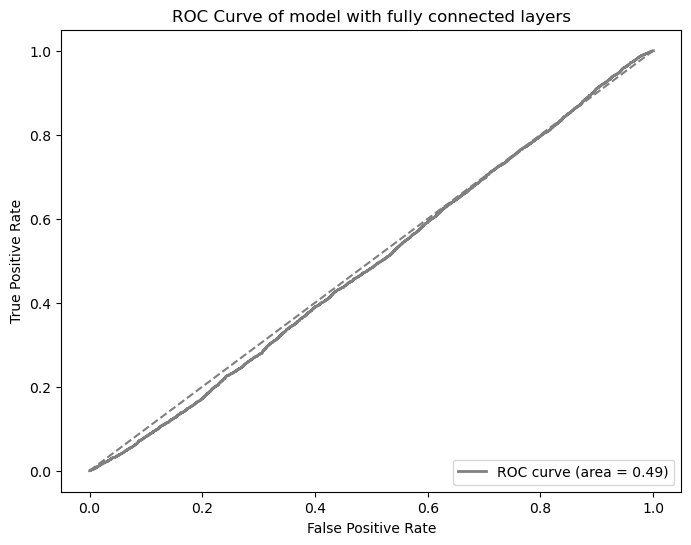

In [69]:
calculate_and_plot_ROC_AUC(base_dir, type='dense', split=split, model_name=model_name+'_dense')